# SubScript Leaderboard Explorer

1. Explore the leaderboard data
2. Use clustering to determine the core users of the service based on their activity
3. Find out which activities are most salient for each cluster

## Dependencies and Defaults

In [1]:
import config as cn
import pandas as pd
import numpy as np
import os
from IPython.display import HTML

In [2]:
dir_home = cn.home_dir
dir_clean = cn.clean_dir
dir_processed = cn.processed_dir
dir_raw = cn.raw_dir

## Clean Player Data

#### Load general player data

In [3]:
df = pd.read_csv(os.path.join(dir_clean,  'processed_player_concat_test.csv'))
df = df.drop_duplicates()
del_cols = [c for c in df.columns.values if 'unnamed' in c.lower()]
del_cols = del_cols + ['guild_rank', 'playable_class', 'playable_race', 'realm_id', 
                       'faction', 'guild_name', 'player', 'realm']

df = df.drop(del_cols, axis = 1)
df = df.set_index('id')

f_cat = os.path.join(cn.clean_dir,'achievement_details_list.csv')
dfc = pd.read_csv(f_cat)
categories = [name.lower() for name in np.unique(dfc.category_name)]

#display(HTML(df.head().to_html()))

#### Remove duplicates and set the index to id column

In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17186 entries, banepally_sargeras to vorske_bloodhoof
Columns: 225 entries, total_achievements to wrath of the lich king
dtypes: float64(8), int64(125), object(92)
memory usage: 29.6+ MB


In [5]:
df.describe()

,total_achievements,total_achievement_points,mounts_collected,pets_collected,completed_quests,honor_level,gear_score,engagement_score,2007-01,2008-01,...,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12,2020-12,general,guild feats of strength
count,17186.000000,17186.000000,17186.000000,17186.000000,17186.000000,17186.000000,17186.000000,17186.000000,17186.0,17186.0,...,17186.000000,17186.000000,17186.000000,17186.000000,17186.000000,17186.000000,17186.000000,17186.0,17186.0,17186.0
mean,1821.582393,16077.812464,255.471605,481.879553,2293.523857,43.185442,424.117596,-144.781532,0.0,0.0,...,27.881473,65.512277,41.155475,31.463459,36.788898,43.907890,35.005004,0.0,0.0,0.0
std,770.612607,6608.093107,150.932440,388.704784,1928.750909,61.453749,51.098736,1320.617969,0.0,0.0,...,25.284080,36.374167,29.768400,25.371818,25.903381,24.898116,28.844390,0.0,0.0,0.0
min,34.000000,335.000000,2.000000,1.000000,57.000000,1.000000,0.000000,-4347.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,1291.000000,11610.000000,140.250000,190.000000,908.000000,9.000000,404.000000,17.170273,0.0,0.0,...,13.000000,44.000000,24.000000,17.000000,22.000000,28.000000,18.000000,0.0,0.0,0.0
50%,1802.000000,15920.000000,231.000000,357.000000,1745.000000,23.000000,439.000000,68.694444,0.0,0.0,...,21.000000,60.000000,34.000000,25.000000,30.000000,39.000000,29.000000,0.0,0.0,0.0
75%,2318.000000,20370.000000,348.000000,683.000000,3050.750000,51.000000,460.000000,302.750000,0.0,0.0,...,33.750000,79.000000,50.000000,37.000000,43.000000,53.000000,43.000000,0.0,0.0,0.0
max,4033.000000,33405.000000,701.000000,2004.000000,10711.000000,762.000000,486.000000,4354.000000,0.0,0.0,...,423.000000,553.000000,359.000000,360.000000,394.000000,411.000000,515.000000,0.0,0.0,0.0


In [11]:

#df.to_csv(os.path.join(dir_clean,  'processed_player_concat_test_catcounts.csv'))
df.head()

,total_achievements,total_achievement_points,mounts_collected,pets_collected,completed_quests,honor_level,gear_score,last_login,time_since_login,engagement_score,...,toy box,twin peaks,visions of n'zoth,war effort,warsong gulch,winter veil,wintergrasp,world,world events,wrath of the lich king
id,,,,,,,,,,,,,,,,,,,,,
banepally_sargeras,3313.0,28520.0,596.0,1594.0,2751.0,191.0,445.0,2020-05-28,8 days 00:00:00.000000000,469.750000,...,"['2016-01', '2016-08', '2018-07', '2020-05', '...","['2012-09', '2011-04', '2012-09', '2014-12', '...","['2020-03', '2020-03', '2020-04', '2020-03', '...","['none', 'none', 'none', '2018-10', 'none', '2...","['2013-06', 'none', 'none', '2009-08', 'none',...","['2015-12', '2008-12', '2008-12', '2012-01', '...","['2009-06', '2013-11', '2009-04', '2009-03', '...","['2017-02', '2017-01', '2017-01', '2017-02', '...","['2010-06', 'none', '2010-09', '2009-10', '201...","['2010-01', '2009-10', '2009-05', '2010-01', '..."
huldrych_sargeras,1419.0,12540.0,106.0,137.0,1754.0,13.0,439.0,2020-05-31,5 days 00:00:00.000000000,371.600000,...,"['2016-01', '2016-08', '2018-07', '2020-05', '...","['2014-12', '2011-04', '2012-09', '2014-12', '...","['2020-03', '2020-03', '2020-04', '2020-03', '...","['none', 'none', 'none', '2018-09', 'none', '2...","['2013-06', 'none', 'none', '2009-11', 'none',...","['2015-12', '2008-12', '2008-12', '2012-01', '...","['2008-11', '2013-11', '2008-12', '2008-12', '...","['2017-02', '2017-01', '2017-01', '2017-02', '...","['2010-06', 'none', '2010-09', '2009-10', '201...","['2009-12', '2009-12', '2009-05', '2010-01', '..."
effu_sargeras,2144.0,18695.0,210.0,449.0,1700.0,47.0,406.0,2020-03-23,74 days 00:00:00.000000000,34.459459,...,"['2018-08', '2016-08', '2018-07', '2020-05', '...","['2014-04', '2011-04', '2011-12', '2014-12', '...","['2020-03', '2020-03', '2020-04', '2020-01', '...","['none', 'none', 'none', '2018-10', 'none', '2...","['2013-06', 'none', 'none', '2012-03', 'none',...","['2015-12', '2011-12', '2009-12', '2012-01', '...","['2014-03', '2010-07', '2009-06', '2009-07', '...","['2017-02', '2017-01', '2017-01', '2017-02', '...","['2009-07', 'none', '2009-09', '2009-10', '200...","['2009-06', '2009-11', '2009-10', '2009-11', '..."
pyright_sargeras,503.0,4215.0,31.0,49.0,1709.0,1.0,347.0,2020-04-26,40 days 00:00:00.000000000,21.250000,...,"['2018-08', '2016-08', '2018-07', '2020-05', '...","['2018-01', '2011-04', '2011-02', '2014-12', '...","['2020-03', '2020-03', '2020-04', '2020-01', '...","['none', 'none', 'none', '2018-10', 'none', '2...","['2013-06', 'none', 'none', '2008-10', 'none',...","['2015-12', '2008-12', '2009-12', '2011-12', '...","['2008-12', '2010-07', '2009-06', '2009-07', '...","['2017-02', '2017-01', '2017-01', '2017-02', '...","['2009-07', 'none', '2009-09', '2014-10', '201...","['2010-02', '2010-02', '2010-02', '2009-11', '..."
rhoena_sargeras,2368.0,20625.0,287.0,734.0,1488.0,19.0,391.0,2020-05-10,26 days 00:00:00.000000000,106.115385,...,"['2017-09', '2016-08', '2018-07', '2020-05', '...","['2010-12', '2011-04', '2010-12', '2014-12', '...","['2020-03', '2020-03', '2020-04', '2020-01', '...","['none', 'none', 'none', '2018-09', 'none', '2...","['2013-06', 'none', 'none', '2010-08', 'none',...","['2015-12', '2008-12', '2008-12', '2008-12', '...","['2008-11', '2010-07', '2008-11', '2008-11', '...","['2017-02', '2017-01', '2017-01', '2017-02', '...","['2008-10', 'none', '2009-09', '2008-10', '200...","['2010-04', '2008-11', '2009-12', '2010-06', '..."


## Random Forest with 13 years of data

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing

In [29]:
df_tree = pd.read_csv(os.path.join(dir_clean,  'processed_player_concat_test_catcounts.csv'))

df_tree = df_tree.drop(['total_achievements','total_achievement_points', 
                        'mounts_collected','pets_collected','completed_quests',
                        'honor_level','gear_score','time_since_login',
                        'engagement_score', '2020-06',  '2020-08', '2020-09', 
                        '2020-10','2020-11', '2020-12', 'last_login'],axis = 1)
df_tree = df_tree.drop(categories, axis=1)
df_tree = df_tree.set_index('id')

df_tree = df_tree.dropna()
df_tree.describe()
display(HTML(df_tree.head().to_html()))

,2007-01,2008-01,2009-01,2010-01,2011-01,2012-01,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2011-02,2012-02,2013-02,2014-02,2015-02,2016-02,2017-02,2018-02,2019-02,2020-02,2011-03,2012-03,2013-03,2014-03,2015-03,2016-03,2017-03,2018-03,2019-03,2020-03,2011-04,2012-04,2013-04,2014-04,2015-04,2016-04,2017-04,2018-04,2019-04,2020-04,2011-05,2012-05,2013-05,2014-05,2015-05,2016-05,2017-05,2018-05,2019-05,2020-05,2011-06,2012-06,2013-06,2014-06,2015-06,2016-06,2017-06,2018-06,2019-06,2011-07,2012-07,2013-07,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2011-08,2012-08,2013-08,2014-08,2015-08,2016-08,2017-08,2018-08,2019-08,2011-09,2012-09,2013-09,2014-09,2015-09,2016-09,2017-09,2018-09,2019-09,2011-10,2012-10,2013-10,2014-10,2015-10,2016-10,2017-10,2018-10,2019-10,2011-11,2012-11,2013-11,2014-11,2015-11,2016-11,2017-11,2018-11,2019-11,2011-12,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
banepally_sargeras,0,0,17,21,30,22,42,16,24,60,16,18,43,38,40,28,33,34,42,27,22,10,10,18,20,22,40,23,41,22,30,31,20,33,23,17,39,13,20,6,26,25,17,38,14,39,19,12,28,20,20,12,25,20,9,50,44,16,26,10,21,21,20,17,32,19,15,24,33,31,65,58,8,29,59,26,11,41,19,64,24,8,29,22,23,25,41,47,39,32,16,67,39,22,41,25,23,25,55,10,53,17,53,45,8,39,18,34,29,42,23,51,46,15,30,31,32
huldrych_sargeras,0,0,15,24,13,16,25,16,12,52,14,15,38,34,16,23,24,32,30,14,18,8,10,19,14,18,33,23,22,14,28,17,15,33,17,14,35,12,14,5,19,29,13,103,12,31,26,12,9,18,18,70,25,48,17,47,65,15,13,181,9,75,17,19,20,24,8,19,22,23,84,68,7,21,23,6,9,52,16,152,24,5,17,20,24,15,46,34,58,18,13,47,49,23,34,18,70,21,45,12,39,21,121,26,8,24,15,34,25,27,23,42,23,14,29,19,18
effu_sargeras,0,0,15,15,5,10,18,19,21,49,21,13,29,44,17,27,23,35,30,14,18,39,12,19,26,25,48,111,44,7,26,21,30,41,15,14,39,32,16,5,24,22,19,48,12,22,14,26,24,31,25,8,60,24,9,36,20,83,32,62,79,23,38,16,15,15,15,45,45,23,60,69,13,17,34,33,9,111,15,85,26,8,17,22,15,11,57,30,46,12,11,45,22,37,57,27,27,29,45,14,28,28,62,38,15,17,27,37,19,25,66,54,26,33,22,27,13
acorn_sargeras,0,0,11,40,12,13,18,18,18,47,20,28,28,44,48,18,21,34,26,13,17,35,12,19,31,12,43,44,33,6,26,19,28,39,46,12,36,24,13,5,24,20,19,47,6,17,14,15,10,13,25,6,54,24,7,26,19,66,24,51,54,23,36,20,42,15,13,36,100,22,60,68,10,10,32,26,8,117,22,99,25,28,23,19,8,11,114,25,41,12,37,32,29,77,51,22,26,29,44,5,24,19,108,28,14,17,26,37,21,23,25,85,22,30,22,26,12
pyright_sargeras,0,0,8,38,9,13,18,16,17,46,18,21,28,44,42,16,21,34,26,13,17,29,12,19,29,12,43,41,29,6,25,19,22,38,45,10,36,24,12,5,24,20,19,68,5,17,14,14,9,13,25,6,38,24,6,26,19,24,18,44,48,23,32,17,29,15,13,36,74,21,61,68,10,10,32,23,5,122,27,90,25,22,21,19,8,11,214,51,142,12,26,32,29,71,47,20,26,29,44,5,24,19,136,26,12,17,26,37,20,23,25,75,21,26,22,26,12


In [65]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=10, test_size=.25, random_state=17)
for train_index, test_index in rs.split(df_tree):
    train_set = df_tree.iloc[train_index].copy()
    test_set = df_tree.iloc[test_index].copy()

y_train = train_set['2020-05']
X_train = train_set.drop('2020-05',axis = 1)
y_test = test_set['2020-05']
X_test = test_set.drop('2020-05',axis = 1)
print(X_train.info())
print(y_train.shape)
print(X_train.info())
print(y_train.shape)

#encoder = preprocessing.LabelEncoder() # get a type error if not encoded
#y_train = encoder.fit_transform(y_train)
#y_test = encoder.fit_transform(y_test)

<class 'pandas.core.frame.DataFrame'>
Index: 15114 entries, karali_stormrage to partyrager_stormreaver
Columns: 116 entries, 2007-01 to 2019-12
dtypes: int64(116)
memory usage: 13.5+ MB
None
(15114,)
<class 'pandas.core.frame.DataFrame'>
Index: 15114 entries, karali_stormrage to partyrager_stormreaver
Columns: 116 entries, 2007-01 to 2019-12
dtypes: int64(116)
memory usage: 13.5+ MB
None
(15114,)


#### Only getting features

In [66]:
# Don't do more than 50 estimators or it will crash
selected = RandomForestClassifier(n_estimators = 200,n_jobs = -1,
                           oob_score = True,bootstrap = True,random_state = 17)
selected.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=17)

In [67]:
importances = selected.feature_importances_
indices = np.argsort(importances)
important_features = X_train.columns.values[indices]

for i, v in enumerate(important_features[:25]):
    print(i,v)

0 2007-01
1 2008-01
2 2012-01
3 2012-07
4 2012-04
5 2012-06
6 2012-05
7 2012-02
8 2011-11
9 2012-03
10 2010-01
11 2011-03
12 2011-10
13 2012-08
14 2011-12
15 2013-10
16 2013-05
17 2014-04
18 2011-04
19 2013-08
20 2011-05
21 2011-09
22 2011-02
23 2013-12
24 2013-06


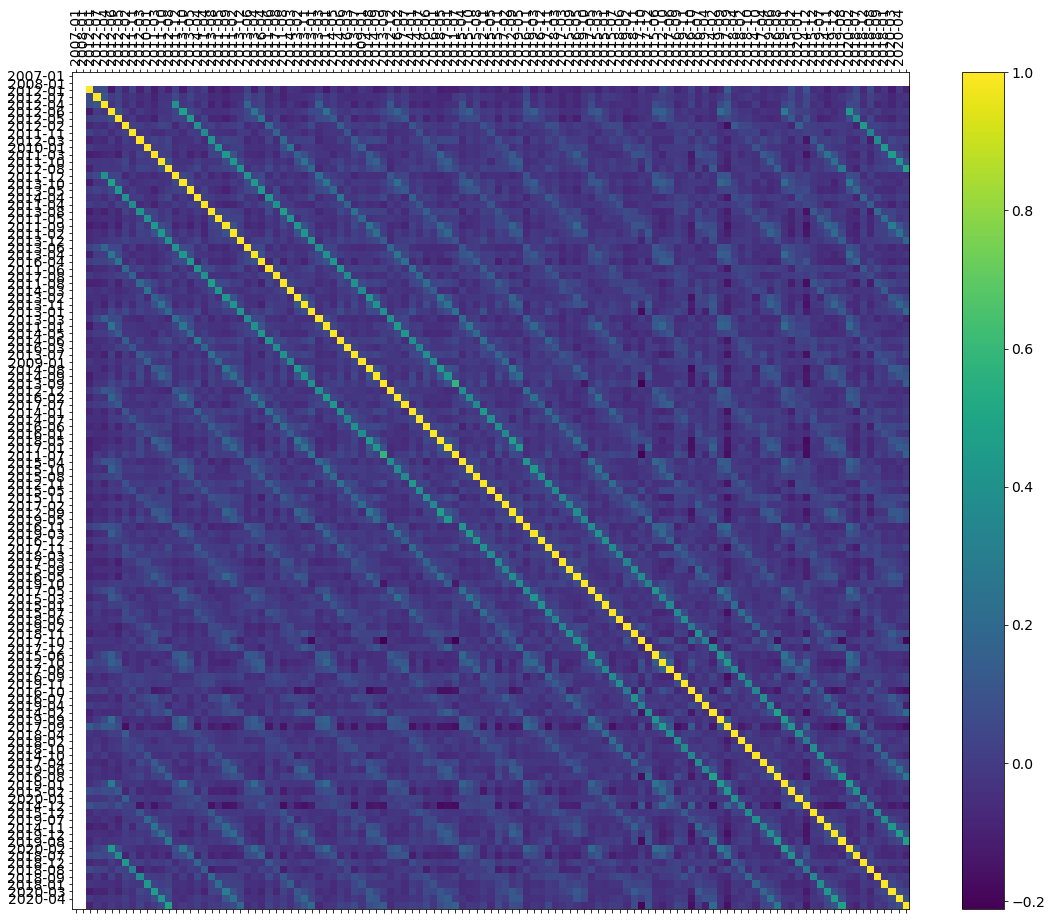

In [68]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(19, 15))
plt.matshow(df_tree.corr(), fignum=fig.number)
plt.xticks(range(df_tree.shape[1]), df_tree[important_features], fontsize=14, rotation=90)
plt.yticks(range(df_tree[important_features].shape[1]), df_tree[important_features], fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

#### Achievement Category Legend
- 81   Feats of Strength
- 92   Character/Leveling
- 95   PVP
- 97   Exploration
- 155  World Events
- 168  Dungeons and Raids
- 169  Professions/Crafting
- 201  Reputation

In [69]:
predictions = selected.predict(X_test)

Working with only 150,000 samples took more than an hour. Will look into spark and aws

In [70]:
df_pred = pd.DataFrame(X_test)
df_pred['prediction'] = predictions
df_pred['actual'] = y_test
display(HTML(df_pred.iloc[:100][:].to_html()))

,2007-01,2008-01,2009-01,2010-01,2011-01,2012-01,2013-01,2014-01,2015-01,2016-01,2017-01,2018-01,2019-01,2020-01,2011-02,2012-02,2013-02,2014-02,2015-02,2016-02,2017-02,2018-02,2019-02,2020-02,2011-03,2012-03,2013-03,2014-03,2015-03,2016-03,2017-03,2018-03,2019-03,2020-03,2011-04,2012-04,2013-04,2014-04,2015-04,2016-04,2017-04,2018-04,2019-04,2020-04,2011-05,2012-05,2013-05,2014-05,2015-05,2016-05,2017-05,2018-05,2019-05,2011-06,2012-06,2013-06,2014-06,2015-06,2016-06,2017-06,2018-06,2019-06,2011-07,2012-07,2013-07,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2011-08,2012-08,2013-08,2014-08,2015-08,2016-08,2017-08,2018-08,2019-08,2011-09,2012-09,2013-09,2014-09,2015-09,2016-09,2017-09,2018-09,2019-09,2011-10,2012-10,2013-10,2014-10,2015-10,2016-10,2017-10,2018-10,2019-10,2011-11,2012-11,2013-11,2014-11,2015-11,2016-11,2017-11,2018-11,2019-11,2011-12,2012-12,2013-12,2014-12,2015-12,2016-12,2017-12,2018-12,2019-12,prediction,actual
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
macdaddyx_vashj,0,0,21,8,18,11,27,54,56,19,24,24,47,40,22,23,39,93,27,7,32,86,32,53,20,13,37,16,29,88,24,73,29,61,16,41,32,57,13,10,59,63,24,78,2,9,38,13,22,16,26,55,21,6,11,46,19,27,11,44,27,57,10,25,23,35,60,39,12,54,78,28,49,34,28,45,39,18,88,28,9,85,30,21,23,37,58,57,12,8,81,36,38,10,48,8,65,13,28,44,53,94,22,34,14,44,18,33,47,46,92,28,12,23,43,34,54,67
tunasalads_executus,0,0,4,24,14,5,29,27,62,31,26,51,47,34,12,10,7,31,41,12,18,5,22,39,6,17,43,21,19,7,19,15,12,37,12,10,15,29,5,71,47,16,27,78,9,10,18,13,4,38,24,8,9,7,12,11,39,13,6,27,49,27,23,9,5,54,17,31,18,71,41,26,17,2,13,16,210,8,100,44,4,27,19,9,27,85,25,69,15,4,50,13,28,17,47,12,20,8,5,24,24,147,82,26,26,21,18,25,84,3,105,64,16,66,43,14,50,56
chelen_chogall,0,0,2,5,14,5,44,36,78,22,26,18,25,19,10,3,21,93,52,43,4,14,12,51,3,4,27,78,38,34,5,17,16,141,8,4,6,63,44,13,32,28,15,100,4,4,9,24,37,25,28,12,44,6,2,24,17,42,35,57,23,77,16,4,25,19,23,21,19,76,209,7,6,19,44,23,58,13,204,175,13,31,60,73,7,28,27,50,33,15,42,41,59,12,32,9,28,33,28,32,27,58,63,19,17,17,36,44,41,34,162,141,17,23,22,22,125,52
hàiliee_silver-hand,0,0,21,17,22,17,25,14,31,13,25,39,26,44,14,21,16,16,21,20,37,47,20,28,29,16,46,56,14,9,129,18,25,29,18,11,55,11,16,16,89,20,17,36,39,5,43,11,19,34,24,15,24,17,10,38,6,19,93,39,35,26,42,4,17,12,13,38,22,56,70,18,38,9,33,9,19,11,45,84,61,120,27,35,27,11,47,48,93,27,87,28,30,14,25,29,75,65,17,28,31,121,14,35,21,25,53,17,22,18,64,10,35,29,20,95,58,58
kotorag_malganis,0,0,24,15,30,62,33,44,64,39,56,10,35,40,11,33,37,27,30,15,37,18,31,40,6,69,37,14,67,10,40,37,20,34,7,28,27,20,22,23,50,23,41,78,3,37,15,18,14,62,73,21,16,8,69,17,21,38,13,40,39,35,26,50,18,8,37,19,20,71,78,19,27,19,64,10,32,41,125,41,10,81,34,30,15,29,33,53,28,3,94,25,54,22,24,24,43,15,26,56,31,98,35,18,20,33,11,38,36,135,98,40,26,55,36,14,33,33
rebbec_hyjal,0,0,12,92,46,9,21,9,51,35,19,18,54,21,42,14,12,14,13,38,40,30,45,17,23,6,15,20,2,83,58,41,17,13,13,20,24,4,11,77,37,39,21,85,16,7,15,12,11,22,15,40,22,13,23,29,5,5,31,24,40,32,11,16,6,7,15,39,29,32,67,5,13,6,50,11,22,27,148,26,31,26,57,27,35,58,33,65,20,20,18,46,25,34,41,19,47,35,11,36,22,44,50,22,28,37,33,16,25,25,30,112,12,23,42,20,67,67
snyderr_frostmourne,0,0,15,1,15,20,12,25,35,22,49,29,19,33,13,18,37,15,5,10,55,31,18,40,6,6,29,47,17,14,66,17,52,41,17,12,7,52,26,8,55,46,48,30,13,4,16,26,41,5,75,48,27,12,12,15,26,16,31,147,70,26,25,3,10,56,12,147,124,49,55,15,17,15,19,17,45,86,128,62,9,44,15,13,39,43,30,65,20,9,45,12,24,23,31,8,25,31,37,22,23,37,22,184,23,26,20,21,25,9,55,10,145,18,38,22,24,119
thrallinn_hyjal,0,0,37,8,16,10,48,9,103,37,35,38,62,25,13,3,26,15,49,14,12,32,39,24,23,7,42,63,20,17,44,21,53,71,11,9,27,36,21,23,49,41,30,94,22,1,32,32,8,7,42,36,35,19,22,27,32,22,19,47,17,36,31,10,41,36,41,120,34,47,90,25,13,12,81,14,35,26,79,36,2,43,30,22,28,32,55,34,22,6,98,19,57,13,33,27,37,24,10,36,8,92,33,49,29,21,17,25,40,9,61,50,61,25,19,41,13,34
puyike_burning-blade,0,0,16,19,13,0,1,136,27,43,36,2

In [71]:
print(selected.score(X_train,y_train))

0.9991398703189096


In [72]:
print(selected.oob_score_)

0.40703983062061666


## Random Forest with 2 years of data

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing

In [98]:
months = np.arange(1, 13)
years = [2019, 2020]
timepoints = []

for month in months:
    if month < 10:
        month = str(0) + str(month)
    for year in years:
        if year == 2020 and month >= '06':
            break
        if year < 2011 and month != '01':

            continue
        else:
            month = str(month)
            timepoints.append(str(year) + '-' + str(month))
print(timepoints)

['2019-01', '2020-01', '2019-02', '2020-02', '2019-03', '2020-03', '2019-04', '2020-04', '2019-05', '2020-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12']


In [99]:
df_tree = pd.read_csv(os.path.join(dir_clean,  'processed_player_concat_test_catcounts.csv'))
df_tree = df_tree.set_index('id')
keep_cols = timepoints
df_tree = df_tree[timepoints]

df_tree = df_tree.dropna()
df_tree.describe()
display(HTML(df_tree.head().to_html()))

,2019-01,2020-01,2019-02,2020-02,2019-03,2020-03,2019-04,2020-04,2019-05,2020-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
id,,,,,,,,,,,,,,,,,
banepally_sargeras,43,38,10,18,20,33,17,38,25,20,20,58,24,32,55,34,32
huldrych_sargeras,38,34,10,19,15,33,13,103,25,48,17,68,24,18,45,34,18
effu_sargeras,29,44,12,19,30,41,19,48,60,24,38,69,26,12,45,37,13
acorn_sargeras,28,44,12,19,28,39,19,47,54,24,36,68,25,12,44,37,12
pyright_sargeras,28,44,12,19,22,38,19,68,38,24,32,68,25,12,44,37,12


In [100]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=10, test_size=.25, random_state=17)
for train_index, test_index in rs.split(df_tree):
    train_set = df_tree.iloc[train_index].copy()
    test_set = df_tree.iloc[test_index].copy()

y_train = train_set['2020-05']
X_train = train_set.drop('2020-05',axis = 1)
y_test = test_set['2020-05']
X_test = test_set.drop('2020-05',axis = 1)


#encoder = preprocessing.LabelEncoder() # get a type error if not encoded
#y_train = encoder.fit_transform(y_train)
#y_test = encoder.fit_transform(y_test)

In [101]:

selected = RandomForestClassifier(n_estimators = 200,n_jobs = -1,
                           oob_score = True,bootstrap = True,random_state = 17)
selected.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=17)

In [102]:
importances = selected.feature_importances_
indices = np.argsort(importances)
important_features = X_train.columns.values[indices]

for i, v in enumerate(important_features[:25]):
    print(i,v)

0 2019-10
1 2019-05
2 2019-09
3 2019-11
4 2019-12
5 2019-02
6 2020-03
7 2019-03
8 2019-04
9 2019-07
10 2019-06
11 2020-02
12 2020-01
13 2019-08
14 2019-01
15 2020-04


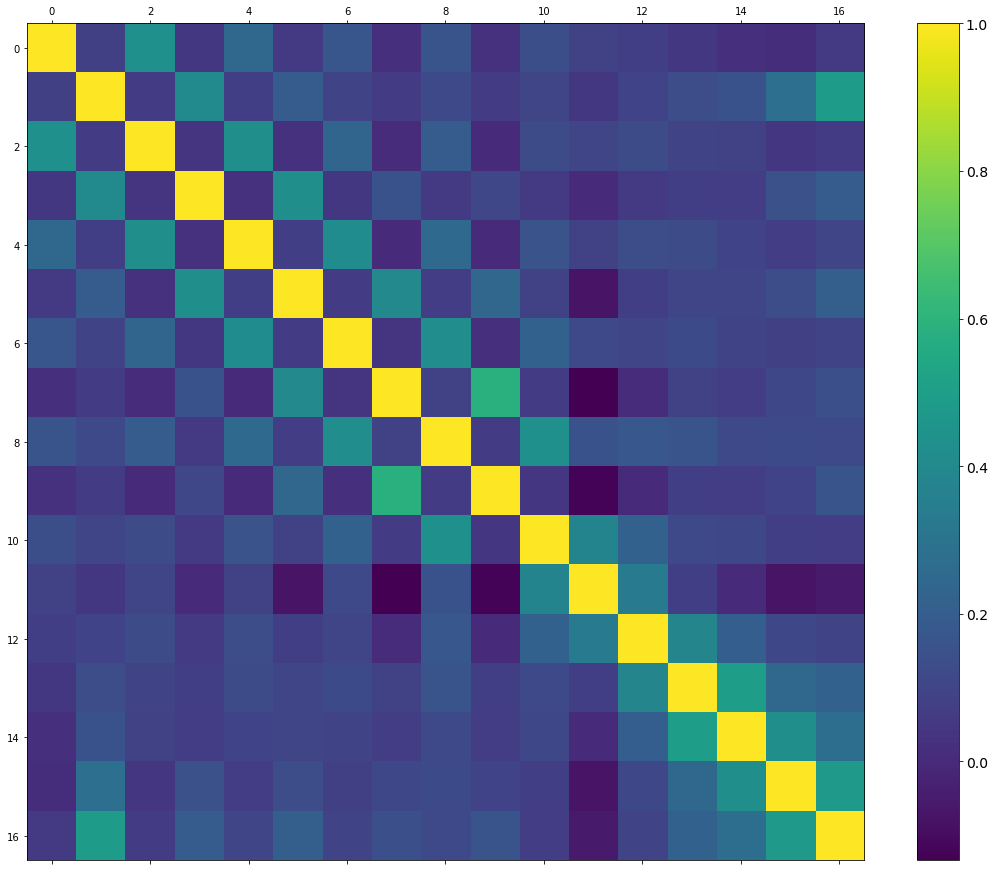

In [104]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(19, 15))
plt.matshow(df_tree.corr(), fignum=fig.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [92]:
predictions = selected.predict(X_test)

In [106]:
df_pred = pd.DataFrame(X_test)
df_pred['prediction'] = predictions
df_pred['actual'] = y_test
display(HTML(df_pred.iloc[:][:].to_html()))

,2019-01,2020-01,2019-02,2020-02,2019-03,2020-03,2019-04,2020-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,prediction,actual
id,,,,,,,,,,,,,,,,,,
macdaddyx_vashj,47,40,32,53,29,61,24,78,21,57,78,28,12,13,18,34,54,67
tunasalads_executus,47,34,22,39,12,37,27,78,9,27,41,44,15,8,18,14,51,56
chelen_chogall,25,19,12,51,16,141,15,100,44,77,209,175,33,33,36,22,49,52
hàiliee_silver-hand,26,44,20,28,25,29,17,36,24,26,70,84,93,65,53,95,58,58
kotorag_malganis,35,40,31,40,20,34,41,78,16,35,78,41,28,15,11,14,33,33
rebbec_hyjal,54,21,45,17,17,13,21,85,22,32,67,26,20,35,33,20,67,67
snyderr_frostmourne,19,33,18,40,52,41,48,30,27,26,55,62,20,31,20,22,24,119
thrallinn_hyjal,62,25,39,24,53,71,30,94,35,36,90,36,22,24,17,41,13,34
puyike_burning-blade,62,42,52,41,48,18,20,13,11,19,73,47,16,17,25,35,14,10


In [94]:
print(selected.score(X_train,y_train))

0.9988090512107979


In [95]:
print(selected.oob_score_)

0.41120815138282385
